# **Визначення аномалій**

У сучасному світі обробка даних є важливим інструментом для прийняття рішень в бізнесі, науці та інших галузях. Однак навіть чіткі дані можуть містити непередбачувані та неправильні значення, які називаються аномаліями або відхиленнями.

**Аномалії можуть виникати з різних причин:**
- від помилок вводу даних до виявлення потенційних проблем.
- вони можуть вказувати на важливі проблеми в даних, такі як шахрайство у фінансових транзакціях,
- неточності в медичних даних
- або невірна робота обладнання в інженерних системах.

Визначення аномалій є важливим завданням у Data Science. Мета полягає в тому, щоб виявити аномалії та виділити їх з набору даних, що допоможе виявити проблеми та покращити якість даних.

![image](https://www.tibco.com/sites/tibco/files/media_entity/2021-12/anomaly-detection-diagram.svg)

![image](https://www.mdpi.com/sensors/sensors-23-02844/article_deploy/html/images/sensors-23-02844-g001.png)



Пошук аномалій в датасеті полягає в тому, щоб виявити нетипові події. Ми представляємо приклади у вигляді векторів ознак і можемо оцінити ймовірність нормальності кожного прикладу у просторі ознак. Приклади з високою ймовірністю є звичайними, а ті, що мають низьку ймовірність, вважаються аномаліями. Ми використовуємо розподіл значень характеристик для розрахунку ймовірності "нормальності" екземплярів.

![image](https://scikit-learn.org/0.19/_images/sphx_glr_plot_lof_001.png)

Нормальний розподіл, також відомий як гаусівський розподіл, є важливим у статистиці та ймовірнісній теорії. Він має симетричну дзвоноподібну форму, де більшість значень знаходиться навколо середнього, а віддалені значення зустрічаються рідше. Параметри розподілу - середнє значення (μ) та стандартне відхилення (σ) - визначають його положення та розкид.

Функція щільності ймовірності нормального розподілу виглядає так:

$$f(x) = \frac{1}{{\sigma \sqrt{2\pi}}} \cdot e^{\frac{-(x-μ)^2}{2σ^2}},$$

де $f(x)$ - ймовірність того, що випадкова величина набуде значення $x$.

Цей розподіл широко використовується у природних науках та соціальних дослідженнях, оскільки він добре описує багато реальних явищ. Візуалізація нормального розподілу показує дзвоноподібну криву, яка представляє ймовірності значень навколо середнього.

# **Алгоритм пошуку аномалій**

За допомогою функції щільності ймовірності нормального розподілу ми розраховуємо ймовірність набуття конкретного значення характеристики для кожного прикладу. Припускаючи, що ознаки екземплярів незалежні (що часто має місце), загальна ймовірність існування такого зразка є добутком ймовірностей по кожній окремій характеристиці:

$$p(\mathbf{x}) = p(x_1; μ_1, σ_1^2) \cdot p(x_2; μ_2, σ_2^2) \cdot p(x_3; μ_3, σ_3^2) \cdot \ldots \cdot p(x_n; μ_n, σ_n^2)$$

або ж:

$$p(\mathbf{x}) = \prod_{i=1}^n p(x_i; μ_i, σ_i^2)$$

Отже, розрахувавши середнє значення $μ$ та стандартне відхилення $σ$ для кожної характеристики наших прикладів:

$$μ_i = \frac{1}{m} \sum_{j=1}^m x_i(j)$$

$$σ_i^2 = \frac{1}{m} \sum_{j=1}^m (x_i(j) - μ_i)^2$$

ми можемо розрахувати ймовірності $p(x_i; μ_i, σ_i^2)$ та загальну ймовірність $p(\mathbf{x})$.

І останнім кроком буде визначення, чи даний приклад є нормальним, чи аномальним:

$$p(\mathbf{x}^{(j)}) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi}\sigma_i} \cdot e^{-\frac{(x_i^{(j)} - μ_i)^2}{2σ_i^2}} < ε$$

де $ε$ - порогове значення, при якому приклад вважається аномалією.

![image](https://www.rad.com/sites/default/files/Media/blog/network-anomalies.png)




**Виявлення аномалій** - це техніка, що використовується для виявлення незвичних шаблонів, які не відповідають очікуваній поведінці, що називаються викидами. Вона має багато застосувань у бізнесі, від виявлення вторгнень (ідентифікація дивних шаблонів в мережевому трафіку, які можуть сигналізувати про хакерську атаку) до моніторингу здоров'я системи (виявлення злоякісної пухлини на скануванні МРТ), і від виявлення шахрайства в транзакціях з кредитними картками до виявлення несправностей в операційних середовищах.


2. **Визначення та типи аномалій**

Аномалії можна умовно поділити на три типи:

- **Точкові аномалії:** Один випадок даних є аномальним, якщо він занадто відрізняється від решти.
- **Контекстуальні аномалії:** Аномальність є специфічною для контексту. Цей тип аномалії звичайний для часових рядів.
- **Колективні аномалії:** Набір випадків даних спільно допомагає виявляти аномалії.



3. **Основна статистика, пов'язана з виявленням аномалій**

```python
# Python клітинка, що демонструє деяку базову статистику
import numpy as np

# припустимо, що `data` - це масив numpy, який містить ваші дані
data = np.random.normal(size=100)  # генеруємо деякі випадкові дані

mean = np.mean(data)
std_dev = np.std(data)

print(f"Середнє: {mean}")
print(f"Стандартне відхилення: {std_dev}")
```
Середнє значення та стандартне відхилення - це основна статистика, яка може бути використана при виявленні аномалій. Якщо точки даних занадто віддалені від середнього значення (більше, ніж на 2 або 3 стандартних відхилення), вони можуть вважатися аномаліями.


4. **Застосування виявлення аномалій**

Виявлення аномалій має численні застосування в різних галузях, включаючи:

- Виявлення шахрайства
- Виявлення вторгнень в мережевий трафік
- Виявлення несправностей в операційних середовищах
- Порушення в екосистемах
- Виявлення ненормальних станів здоров'я


# **Extreme Value Analysis:**

## **Standard Deviation**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import data
data = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

# Input data
df = data[["sepal_length", "sepal_width"]]
df.head()


,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [2]:
# Outlier detection using 3 * std
data_mean, data_std = df.mean(), df.std()
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

outliers_3std = ((df < lower) | (df > upper)).any(axis=1)
outliers_removed_3std = df[~outliers_3std]


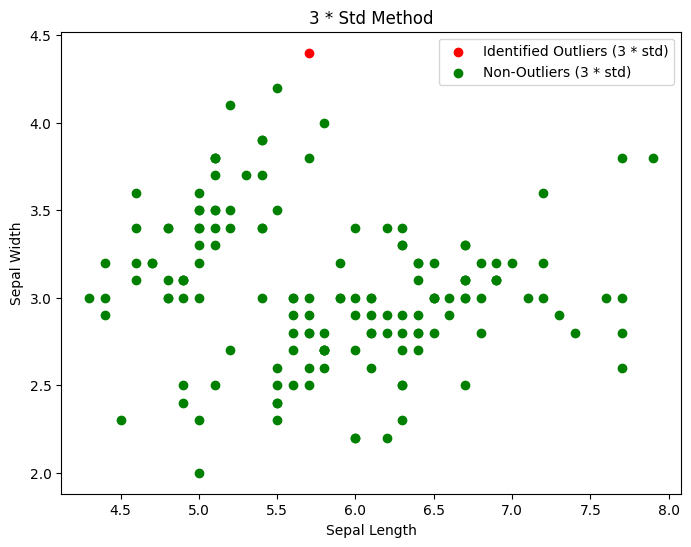

In [3]:

# Plotting the data
plt.figure(figsize=(8, 6))

# plt.scatter(df["sepal_length"], df["sepal_width"], color='blue', label='Original Data')
plt.scatter(df[outliers_3std]["sepal_length"], df[outliers_3std]["sepal_width"], color='red', label='Identified Outliers (3 * std)')
plt.scatter(outliers_removed_3std["sepal_length"], outliers_removed_3std["sepal_width"], color='green', label='Non-Outliers (3 * std)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('3 * Std Method')
plt.legend()

plt.show()


## **Interquartile Range**

In [4]:
# IQR method
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_iqr = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
outliers_removed_iqr = df[~outliers_iqr]


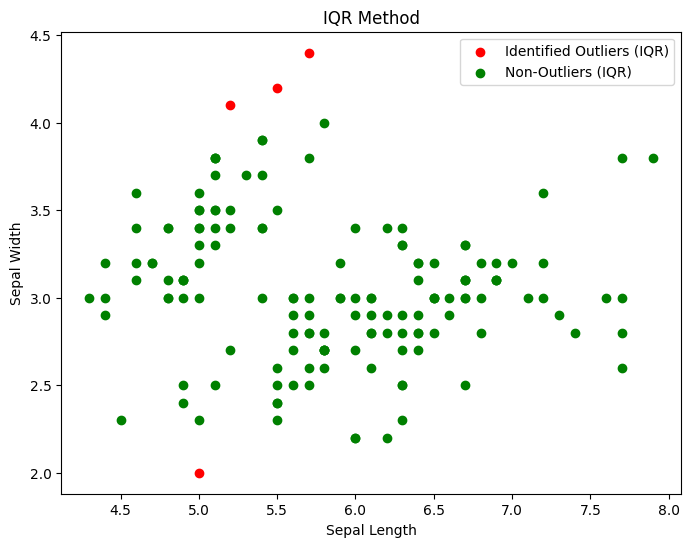

In [5]:
# Plotting the data
plt.figure(figsize=(8, 6))

# plt.scatter(df["sepal_length"], df["sepal_width"], color='blue', label='Original Data')
plt.scatter(df[outliers_iqr]["sepal_length"], df[outliers_iqr]["sepal_width"], color='red', label='Identified Outliers (IQR)')
plt.scatter(outliers_removed_iqr["sepal_length"], outliers_removed_iqr["sepal_width"], color='green', label='Non-Outliers (IQR)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('IQR Method')
plt.legend()

plt.show()


## **Visualise Graph through Boxplot and Scatterplot**


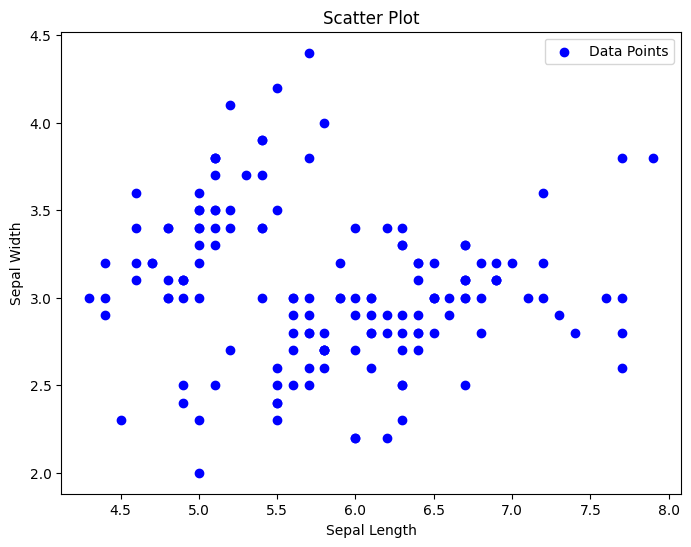

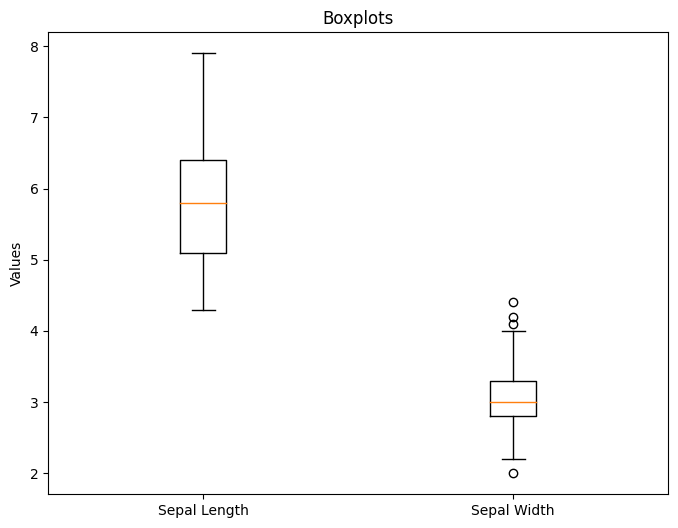

In [6]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df["sepal_length"], df["sepal_width"], color='blue', label='Data Points')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot')
plt.legend()
plt.show()

# Boxplots
plt.figure(figsize=(8, 6))
plt.boxplot([df["sepal_length"], df["sepal_width"]], labels=["Sepal Length", "Sepal Width"])
plt.ylabel('Values')
plt.title('Boxplots')
plt.show()

## **Z Score**

In [7]:
from scipy import stats

# Z-score method for anomaly detection
z_scores = np.abs(stats.zscore(df))

# Define the threshold
threshold = 3

# Find the indices of data points with Z-scores greater than or equal to 3 or less than or equal to -3
anomaly_indices = np.where((z_scores > threshold))

# Get the rows where the anomalies are present
anomalies = df.iloc[anomaly_indices[0]]


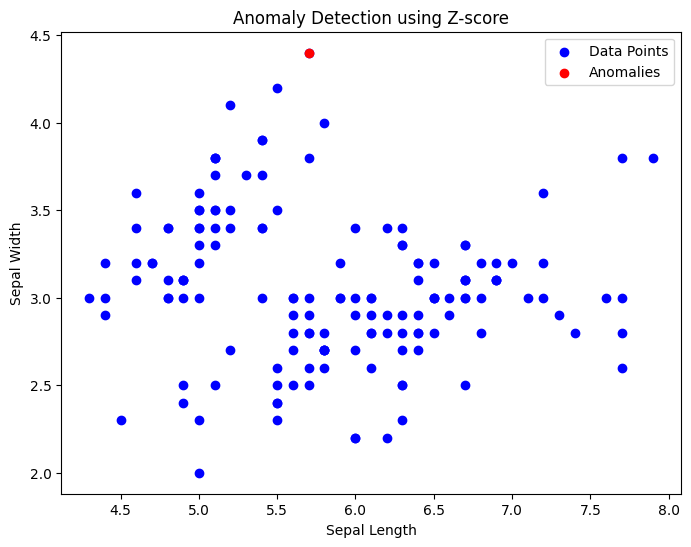

In [8]:
# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(df["sepal_length"], df["sepal_width"], color='blue', label='Data Points')
plt.scatter(anomalies["sepal_length"], anomalies["sepal_width"], color='red', label='Anomalies')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Anomaly Detection using Z-score')
plt.legend()
plt.show()


# **kNN**

In [9]:
pip install pyod

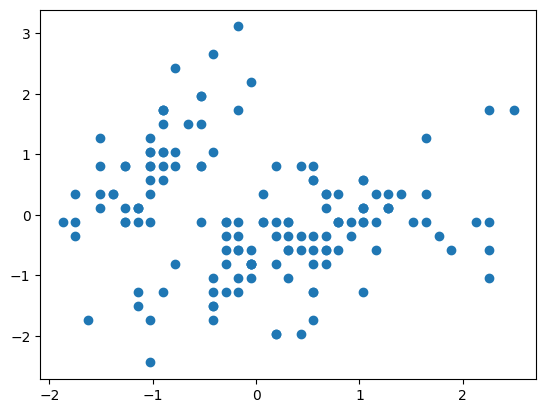

In [10]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Scatterplot of inputs data
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1])


In [11]:
# Instantiate model
nbrs = NearestNeighbors(n_neighbors=3)

# Fit model
nbrs.fit(df_scaled)



NearestNeighbors(n_neighbors=3)

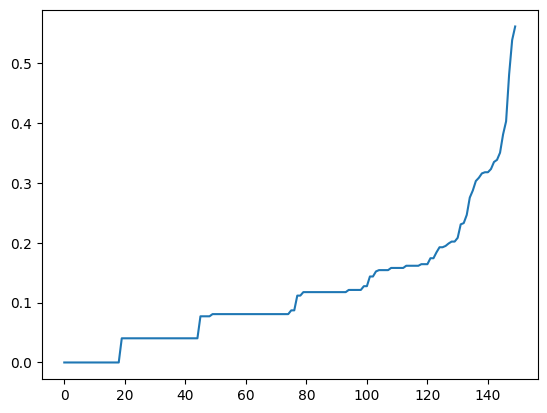

In [12]:
# Distances and indexes of k-neighbors from model outputs
distances, indexes = nbrs.kneighbors(df_scaled)

# Plot mean of k-distances of each observation
plt.plot(np.sort(distances.mean(axis=1)))


In [13]:
# Visually determine cutoff values > 0.3
outlier_index = np.where(distances.mean(axis=1) > 0.3)


In [14]:
# Filter outlier values
outlier_values = pd.DataFrame(df_scaled.values[outlier_index], columns=df.columns)
outlier_values[:10]


,sepal_length,sepal_width
0,-0.052506,2.189072
1,-0.173674,3.114684
2,-1.506521,1.263460
3,-0.779513,2.420475
4,-0.416010,2.651878
5,-1.627688,-1.744778
6,-0.779513,-0.819166
7,-1.021849,-2.438987
8,0.068662,0.337848
9,1.038005,-1.281972


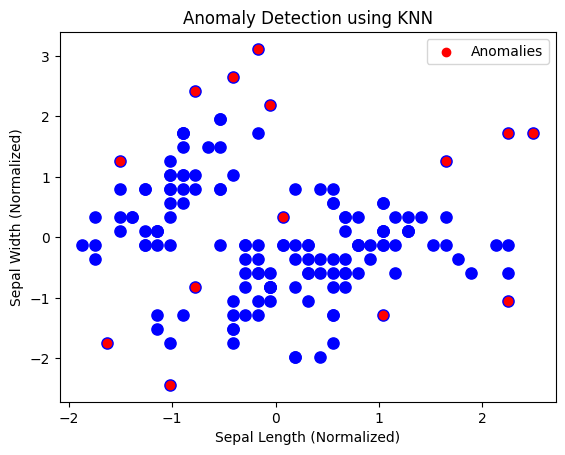

In [15]:
# Plot data
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], color="b", s=65)

# # Plot outlier values
plt.scatter(outlier_values.iloc[:,0], outlier_values.iloc[:,1], color="r", label="Anomalies")
plt.xlabel('Sepal Length (Normalized)')
plt.ylabel('Sepal Width (Normalized)')
plt.title('Anomaly Detection using KNN')
plt.legend()
plt.show()


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pyod.models.knn import KNN
from pyod.utils import example
from sklearn.metrics import accuracy_score

# Create a target column, where 0 represents inliers and 1 represents outliers
df_scaled["target"] = 0
outlier_values["target"] = 1

# Concatenate the inliers and outliers data
data = pd.concat([df_scaled, outlier_values], axis=0).reset_index(drop=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1:], test_size=0.3, stratify=data.iloc[:, -1:])


col_0,0,1
row_0,,
0,99,5
1,5,5


Accuracy Train: 0.9122807017543859


col_0,0,1
row_0,,
0,43,3
1,2,2


Accuracy Test: 0.9


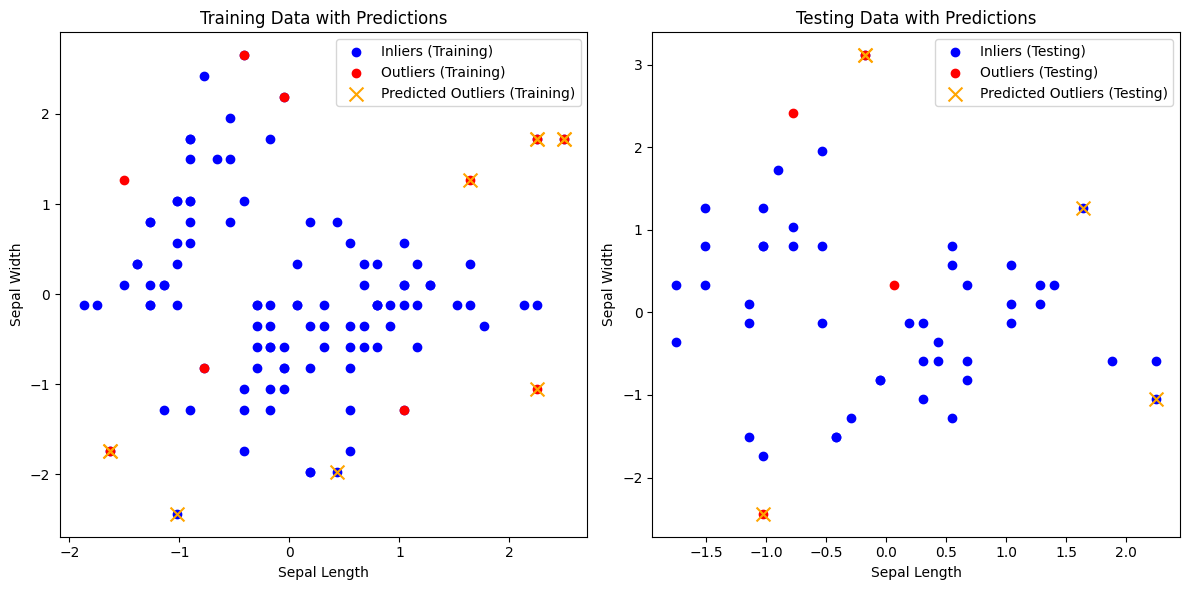

In [17]:
# Initialize and train the KNN model
knn = KNN(contamination=0.08, n_neighbors=5)
knn.fit(X_train)

# Make predictions on the training data
y_train_pred = knn.labels_
y_train_scores = knn.decision_scores_

# Make predictions on the test data
y_test_pred = knn.predict(X_test)
y_test_scores = knn.decision_function(X_test)

# Display the confusion matrix
display(pd.crosstab(y_train.values.reshape(-1), y_train_pred))
# Calculate accuracy
acc_score = accuracy_score(y_train.values.reshape(-1), y_train_pred)
print("Accuracy Train:", acc_score)


# Display the confusion matrix
display(pd.crosstab(y_test.values.reshape(-1), y_test_pred))
# Calculate accuracy
acc_score = accuracy_score(y_test.values.reshape(-1), y_test_pred)
print("Accuracy Test:", acc_score)

# Visualize the training data with predictions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train["target"] == 0]["sepal_length"], X_train[y_train["target"] == 0]["sepal_width"], color='blue', label='Inliers (Training)')
plt.scatter(X_train[y_train["target"] == 1]["sepal_length"], X_train[y_train["target"] == 1]["sepal_width"], color='red', label='Outliers (Training)')
plt.scatter(X_train[y_train_pred == 1]["sepal_length"], X_train[y_train_pred == 1]["sepal_width"], color='orange', marker='x', s=100, label='Predicted Outliers (Training)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Training Data with Predictions')
plt.legend()

# Visualize the testing data with predictions
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test["target"] == 0]["sepal_length"], X_test[y_test["target"] == 0]["sepal_width"], color='blue', label='Inliers (Testing)')
plt.scatter(X_test[y_test["target"] == 1]["sepal_length"], X_test[y_test["target"] == 1]["sepal_width"], color='red', label='Outliers (Testing)')
plt.scatter(X_test[y_test_pred == 1]["sepal_length"], X_test[y_test_pred == 1]["sepal_width"], color='orange', marker='x', s=100, label='Predicted Outliers (Testing)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Testing Data with Predictions')
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


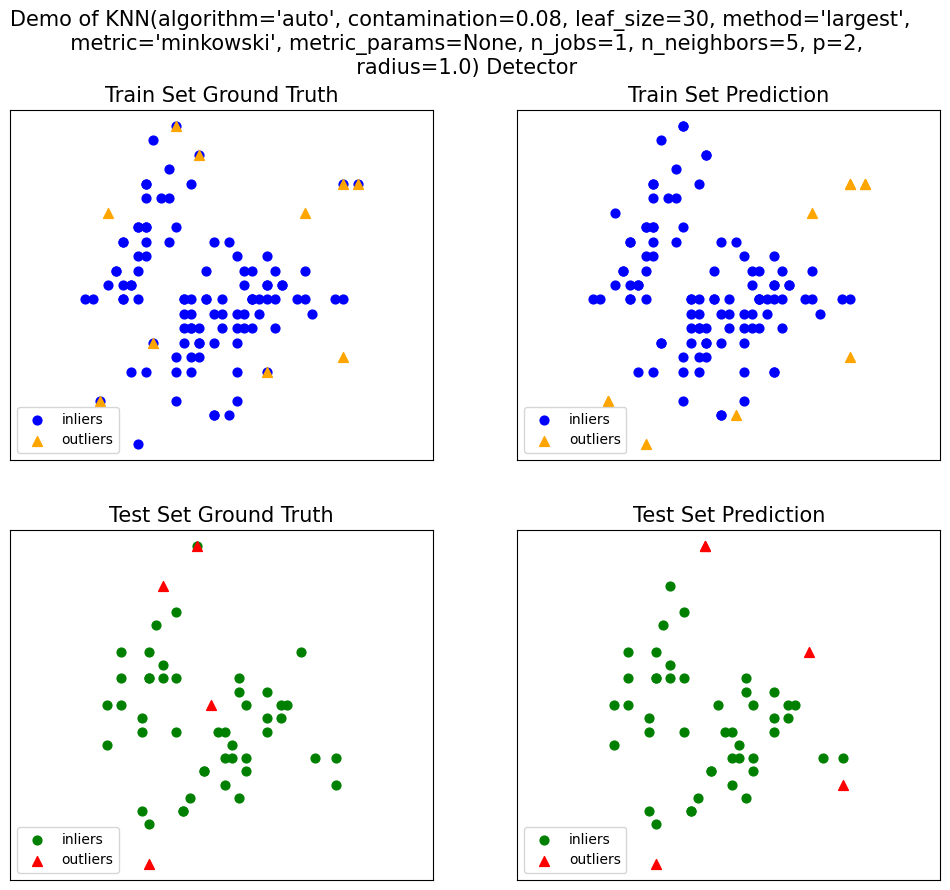

In [18]:
# Visualize the results
example.visualize(knn, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)


## **Through distributions**

<ipython-input-19-a3cfbe717a85>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sepal_length'])


Skewness (Sepal Length): 0.314911
Kurtosis (Sepal Length): -0.552064


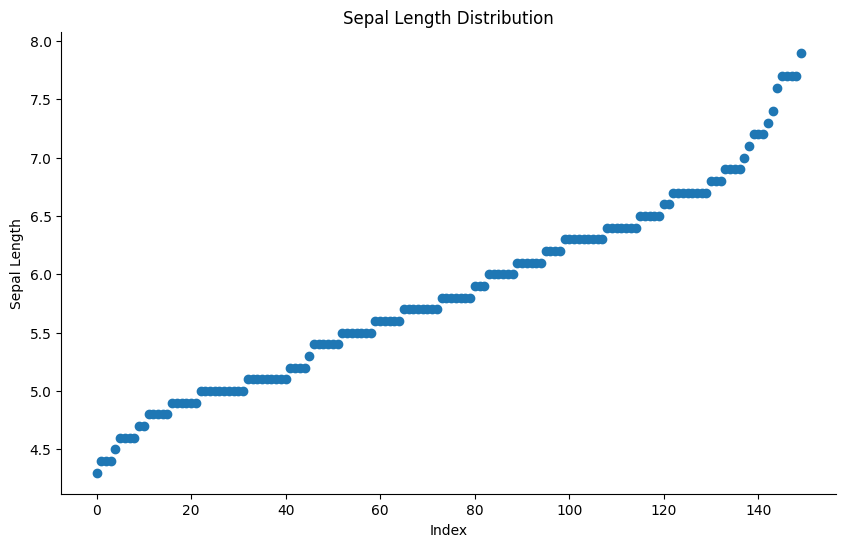

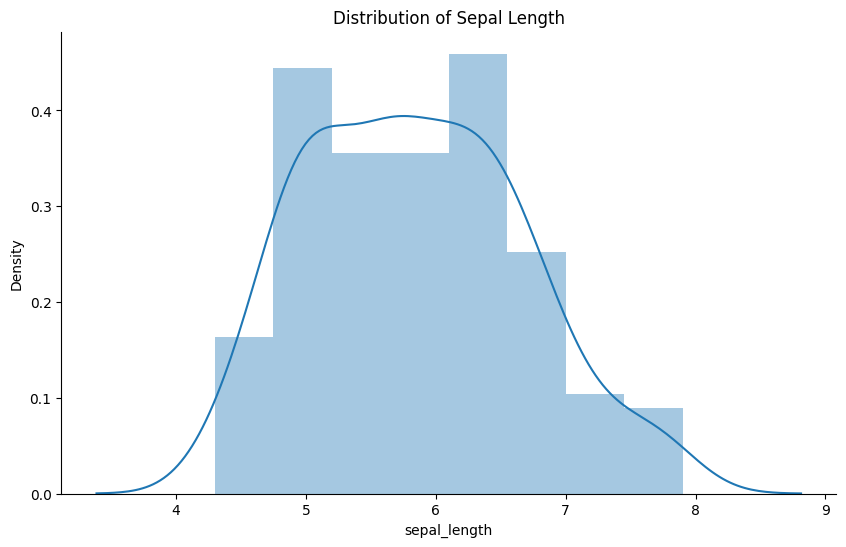

In [19]:
import seaborn as sns

# Visualizing Sales (sepal_length) distribution
plt.figure(figsize=(10, 6))
plt.scatter(range(df.shape[0]), np.sort(df['sepal_length'].values))
plt.xlabel('Index')
plt.ylabel('Sepal Length')
plt.title("Sepal Length Distribution")
sns.despine()

plt.figure(figsize=(10, 6))
sns.distplot(df['sepal_length'])
plt.title("Distribution of Sepal Length")
sns.despine()

print("Skewness (Sepal Length): %f" % df['sepal_length'].skew())
print("Kurtosis (Sepal Length): %f" % df['sepal_length'].kurt())


<ipython-input-20-0efeeb8bf266>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sepal_width'])


Skewness (Sepal Width): 0.334053
Kurtosis (Sepal Width): 0.290781


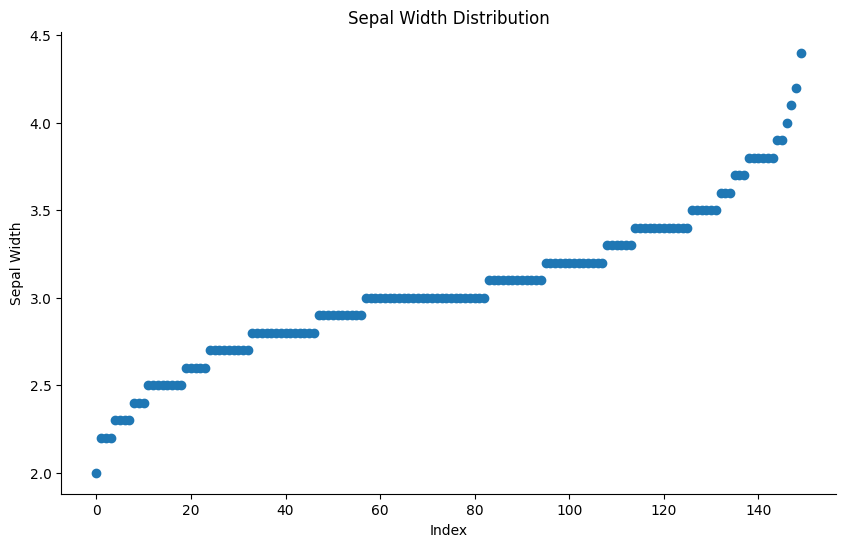

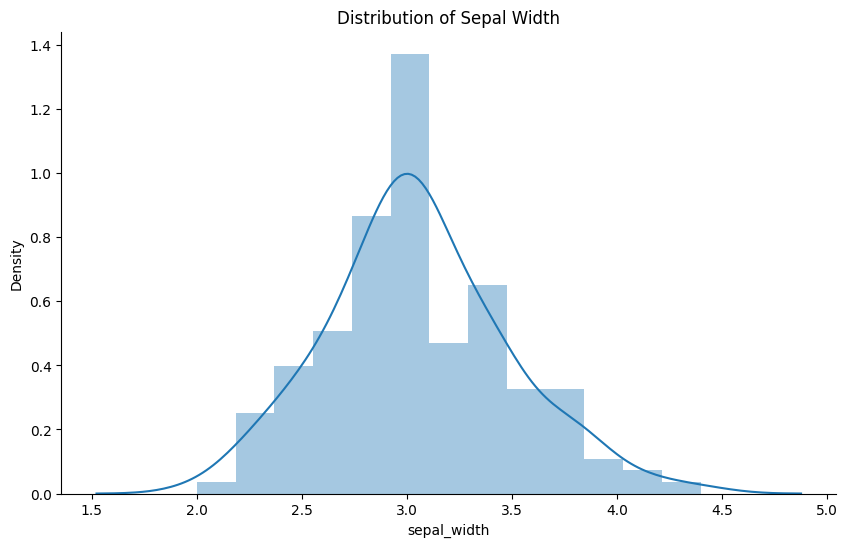

In [20]:
# Visualizing Profit (sepal_width) distribution
plt.figure(figsize=(10, 6))
plt.scatter(range(df.shape[0]), np.sort(df['sepal_width'].values))
plt.xlabel('Index')
plt.ylabel('Sepal Width')
plt.title("Sepal Width Distribution")
sns.despine()

plt.figure(figsize=(10, 6))
sns.distplot(df['sepal_width'])
plt.title("Distribution of Sepal Width")
sns.despine()

print("Skewness (Sepal Width): %f" % df['sepal_width'].skew())
print("Kurtosis (Sepal Width): %f" % df['sepal_width'].kurt())


# **Isolation Forest**

Складний ліс (Isolation Forest або IF) - це навчальний алгоритм машинного навчання без нагляду, який використовується для виявлення аномалій. Ідея за IF полягає в тому, щоб виокремити аномалії більш ефективно та ефективніше, ніж традиційні методи. Це досягається за допомогою випадкового вибору ознак та випадкового вибору точок розділу між мінімальними та максимальними значеннями вибраних ознак для виокремлення аномалій.

**Ключові кроки в алгоритмі Isolation Forest такі:**

**1. Ізольовані дерева:**
   - IF будує набір ізольованих дерев. Кожне дерево росте рекурсивно шляхом випадкового вибору ознаки, а потім вибору точки розділу для цієї ознаки, створюючи бінарні розділи.
   - Процес триває до тих пір, поки всі точки даних не будуть ізольовані у своїх власних листових вузлах.

**2. Довжина шляху:**
   - Для кожної точки даних IF обчислює довжину шляху від кореневого вузла до листового вузла в кожному ізольованому дереві. Довжина шляху представляє кількість розділів, необхідних для ізоляції точки даних.

**3. Оцінка аномалій:**
   - Оцінка аномалій для точки даних обчислюється як середня довжина шляху по всіх ізольованих деревах.
   - Очікується, що аномалії матимуть менші значення оцінки аномалій, оскільки їх легше ізолювати.

**4. Функція прийняття рішень:**
   - IF використовує функцію прийняття рішень для класифікації точок даних як викиди або не викиди на основі оцінок аномалій.
   - Точки даних з оцінками аномалій нижче порогового значення класифікуються як викиди, тоді як ті, що перевищують порогове значення, класифікуються як не викиди.

За допомогою Isolation Forest ми можемо виявити можливі аномалії або викиди в ознаках "sepal_length" та "sepal_width" набору даних Iris. Області з низькими оцінками аномалій більш імовірно містять викиди.

![image](https://www.researchgate.net/publication/350551253/figure/fig3/AS:1007770669174784@1617282659072/Anomaly-Detection-using-Isolation-Forest-18.png)

![image](https://miro.medium.com/v2/resize:fit:1400/1*6GFMewU1Aax57nsW2uSakQ.png)

![image](https://www.researchgate.net/publication/352017898/figure/fig1/AS:1029757483372550@1622524724599/Isolation-Forest-learned-iForest-construction-for-toy-dataset.png)

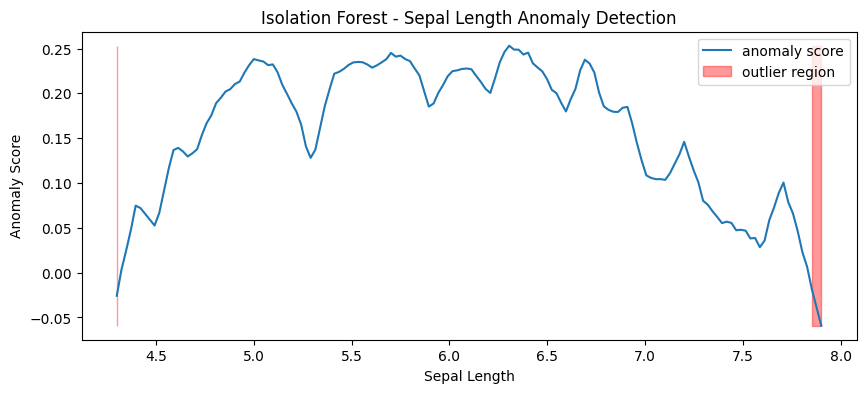

In [21]:
from sklearn.ensemble import IsolationForest

# Isolation Forest for Sepal Length
isolation_forest_length = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest_length.fit(df['sepal_length'].values.reshape(-1, 1))
xx_length = np.linspace(df['sepal_length'].min(), df['sepal_length'].max(), len(df)).reshape(-1,1)
anomaly_score_length = isolation_forest_length.decision_function(xx_length)
outlier_length = isolation_forest_length.predict(xx_length)

# Plotting Sepal Length anomaly scores and outlier region
plt.figure(figsize=(10, 4))
plt.plot(xx_length, anomaly_score_length, label='anomaly score')
plt.fill_between(xx_length.T[0], np.min(anomaly_score_length), np.max(anomaly_score_length),
                 where=outlier_length==-1, color='r', alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('Anomaly Score')
plt.xlabel('Sepal Length')
plt.title('Isolation Forest - Sepal Length Anomaly Detection')
plt.show()


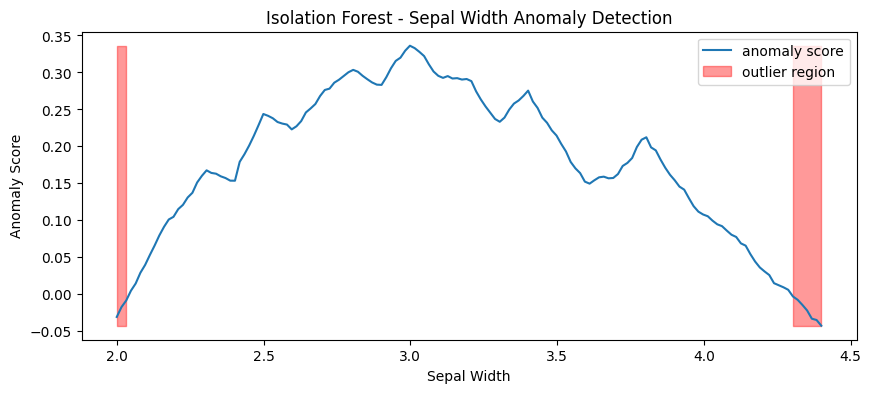

In [22]:
# Isolation Forest for Sepal Width
isolation_forest_width = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest_width.fit(df['sepal_width'].values.reshape(-1, 1))
xx_width = np.linspace(df['sepal_width'].min(), df['sepal_width'].max(), len(df)).reshape(-1,1)
anomaly_score_width = isolation_forest_width.decision_function(xx_width)
outlier_width = isolation_forest_width.predict(xx_width)

# Plotting Sepal Width anomaly scores and outlier region
plt.figure(figsize=(10, 4))
plt.plot(xx_width, anomaly_score_width, label='anomaly score')
plt.fill_between(xx_width.T[0], np.min(anomaly_score_width), np.max(anomaly_score_width),
                 where=outlier_width==-1, color='r', alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('Anomaly Score')
plt.xlabel('Sepal Width')
plt.title('Isolation Forest - Sepal Width Anomaly Detection')
plt.show()


In [23]:
# Python cell demonstrating anomaly detection with train/test split, visualization, and AUC score calculation
import plotly.graph_objects as go
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score

# assuming `data` is a numpy array containing your one-dimensional data
data = np.random.normal(size=200)  # generating some random data

# assuming `labels` is a numpy array containing your binary labels
labels = np.random.randint(2, size=200)  # generating some random labels for the demonstration

# splitting data and labels into train and validation sets
train, validation, train_labels, validation_labels = train_test_split(data, labels, test_size=0.5, random_state=42)

# reshaping data for model input
train = train.reshape(-1, 1)
validation = validation.reshape(-1, 1)

clf = IsolationForest(contamination=0.5)
clf.fit(train)

# predicting anomalies and anomaly scores in the validation set
preds = clf.predict(validation)
scores = clf.decision_function(validation)

# scaling scores between 0 and 1 for better color mapping
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_scores = scaler.fit_transform(scores.reshape(-1, 1))

# calculating the AUC score
auc = roc_auc_score(validation_labels, scores)

print(f'AUC score: {auc}')

# creating index array for x-axis
indices = np.array(range(len(validation)))

fig = go.Figure()

# adding data points colored by their anomaly scores
fig.add_trace(go.Scatter(x=indices, y=validation.flatten(),
                    mode='markers',
                    marker=dict(
                        size=10,
                        color=scaled_scores.flatten(), # setting color to anomaly scores
                        colorscale='Viridis', # choosing a colorscale
                        colorbar=dict(title="Anomaly<br>Score"), # adding color bar
                        line=dict(width=2)),
                    name='Data'))

fig.show()


AUC score: 0.497591328783621


## **CBLOF**



![image](https://www.mdpi.com/electronics/electronics-10-02236/article_deploy/html/images/electronics-10-02236-g001.png)

![image](https://miro.medium.com/v2/resize:fit:1400/1*HbJmFlSlhVqy2kgF9LgcjA.png)

**CBLOF (Cluster-Based Local Outlier Factor)** - це алгоритм виявлення аномалій, який спирається на ідею кластеризації точок даних та обчислення локального коефіцієнта аномалії для кожної точки в межах кожного кластера. Ідея полягає в тому, що аномальні точки, як правило, віддалені від інших точок в межах кластеру і мають менший локальний коефіцієнт аномалії.

**Основні кроки CBLOF:**

**1. Кластеризація:**
   - Алгоритм кластеризації застосовується для групування точок даних у кластери. Кожна точка призначається до певного кластеру в залежності від своїх характеристик і відстані від інших точок.

**2. Розрахунок локального коефіцієнта аномалії:**
   - Для кожної точки даних обчислюється локальний коефіцієнт аномалії, який відображає відстань від точки до своїх найближчих сусідів у межах кластеру.

**3. Прийняття рішень:**
   - Порівнюючи локальні коефіцієнти аномалії кожної точки з певним пороговим значенням, алгоритм класифікує точки як аномалії або не аномалії.



In [24]:
from pyod.models.cblof import CBLOF

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Set the fraction of outliers
outliers_fraction = 0.1

# Initialize CBLOF model
clf = CBLOF(contamination=outliers_fraction, check_estimator=False, random_state=0)

# Fit the model
clf.fit(df_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=0,
   use_weights=False)

In [25]:

# Prediction of a datapoint category (outlier or inlier)
y_pred = clf.predict(df_scaled)

# Add the predictions to the DataFrame
df_scaled['outlier'] = y_pred.tolist()

# Separate inliers and outliers
inliers = df_scaled[df_scaled['outlier'] == 0]
outliers = df_scaled[df_scaled['outlier'] == 1]


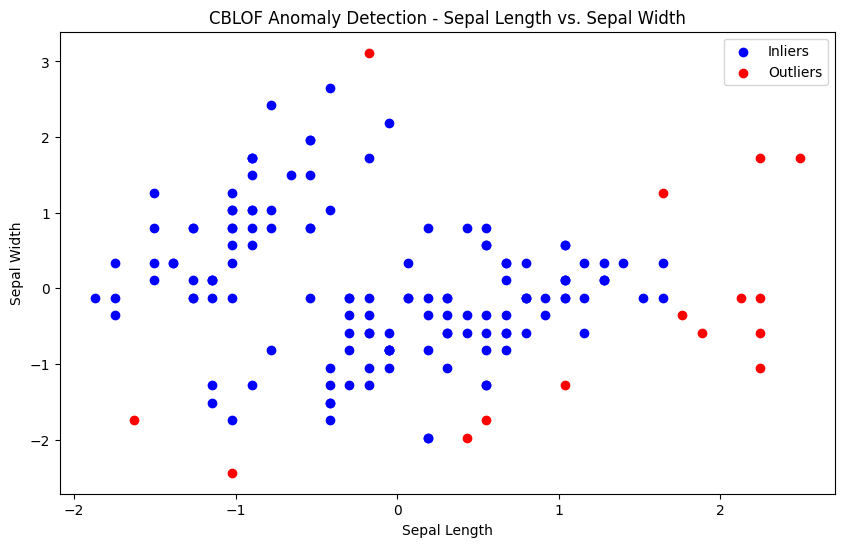

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(inliers['sepal_length'], inliers['sepal_width'], c='blue', label='Inliers')
plt.scatter(outliers['sepal_length'], outliers['sepal_width'], c='red', label='Outliers')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('CBLOF Anomaly Detection - Sepal Length vs. Sepal Width')
plt.legend()
plt.show()


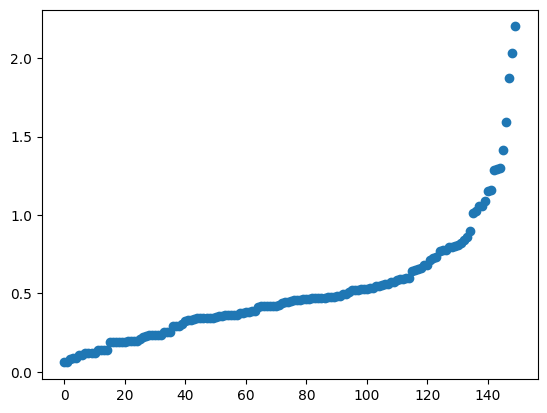

In [27]:

plt.scatter(np.arange(len(df_scaled)), sorted(clf.decision_function(df_scaled.iloc[:,:2])))

In [28]:

# Prediction of a datapoint category (outlier or inlier)
scores = clf.decision_function(df_scaled.iloc[:,:2])

# Add the predictions to the DataFrame
df_scaled['scores'] = scores

# Separate inliers and outliers
inliers = df_scaled[df_scaled['scores'] <= .85]
outliers = df_scaled[df_scaled['scores'] > .85]


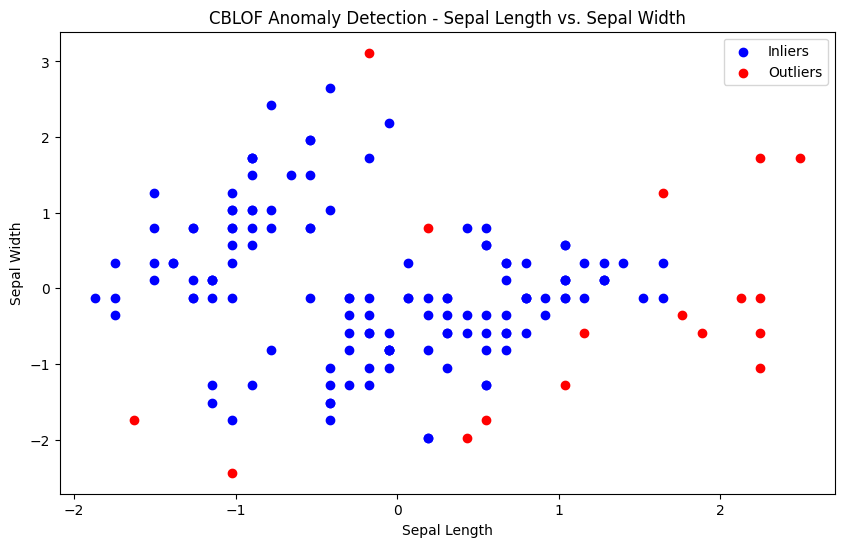

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(inliers['sepal_length'], inliers['sepal_width'], c='blue', label='Inliers')
plt.scatter(outliers['sepal_length'], outliers['sepal_width'], c='red', label='Outliers')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('CBLOF Anomaly Detection - Sepal Length vs. Sepal Width')
plt.legend()
plt.show()



## **ABOD (Angle-Based Outlier Detection):**

![image](https://2.bp.blogspot.com/-6V5HoNXiyLc/W3G7X9gorAI/AAAAAAAAGxk/bKjaye7jWsMt2J_IBGQPIj2U72iyJWcXwCLcBGAs/s1600/ABOD_1.png)

ABOD (Angle-Based Outlier Detection) - це алгоритм машинного навчання, який використовується для виявлення аномалій у наборах даних. Він базується на вимірюванні кутів між точками у просторі, а також на їхніх відстанях до найближчих сусідів. ABOD виявляє аномалії, спираючись на те, що вони мають відмінні кути та відстані до сусідів порівняно зі звичайними точками.

Принцип роботи ABOD:

1. Крок 1: Вимірювання відстаней
   ABOD обчислює відстані між кожною точкою і її найближчими сусідами. Ці відстані використовуються для визначення кількості та типів сусідів кожної точки.

2. Крок 2: Вимірювання кутів
   При визначенні аномалій ABOD також обчислює кути між кожною точкою і її сусідами. Кути використовуються для оцінки того, наскільки точка відрізняється від своїх сусідів.

3. Крок 3: Визначення аномалій
   ABOD порівнює кути та відстані кожної точки з кути та відстанями її сусідів. Точки, у яких кути і відстані суттєво відрізняються від сусідніх точок, вважаються аномаліями.

4. Крок 4: Виявлення аномалій
   Після порівняння кутів та відстаней ABOD розраховує оцінки аномалій для кожної точки. Точки з високими оцінками вважаються аномаліями, оскільки вони мають незвичайні відстані та кути порівняно зі звичайними точками.

5. Крок 5: Візуалізація
   Після виявлення аномалій за допомогою ABOD можна візуалізувати результати на графіку розсіювання. Аномальні точки можуть бути позначені іншим кольором або символом для виділення.

ABOD є ефективним методом виявлення аномалій, особливо в великих наборах даних. Він може успішно застосовуватись для виявлення аномалій у різних типах даних і добре справляється з даними в високих вимірах. Проте, він також має свої обмеження, такі як врахування лише локальної інформації та чутливість до шуму в даних.


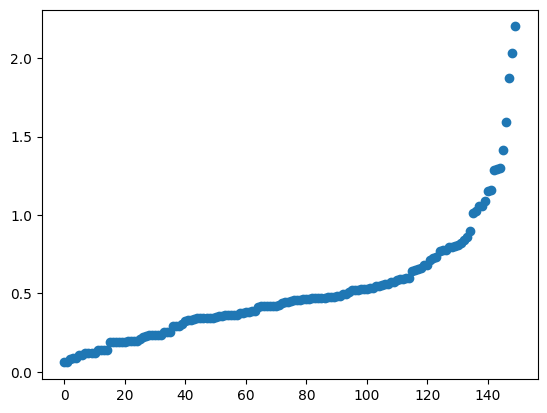

In [30]:

plt.scatter(np.arange(len(df_scaled)), sorted(clf.decision_function(df_scaled.iloc[:,:2])))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning:

invalid value encountered in double_scalars



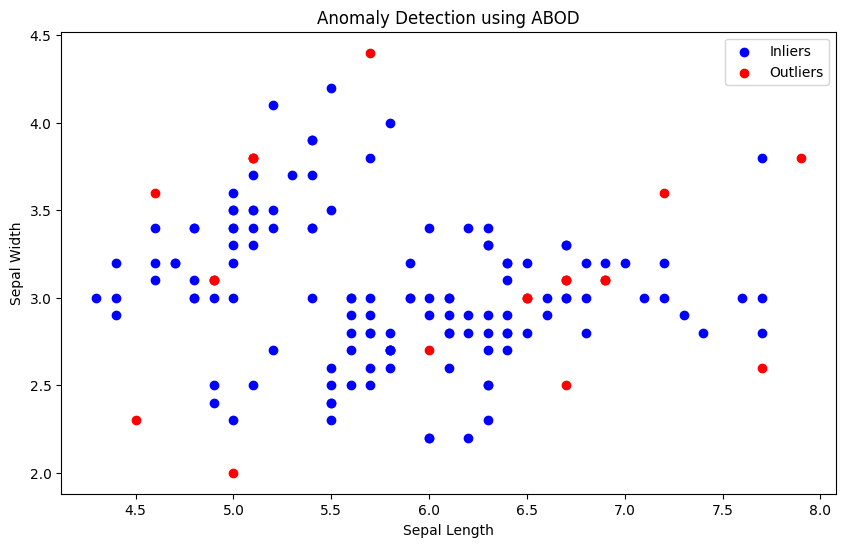

In [31]:

from pyod.models.abod import ABOD

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Initialize ABOD model
clf = ABOD(contamination=0.1)

# Fit the model
clf.fit(df_scaled)

# Predict raw anomaly score
scores_pred = clf.decision_function(df_scaled) * -1

# Prediction of a datapoint category (outlier or inlier)
y_pred = clf.predict(df_scaled)

import matplotlib.pyplot as plt

# Separate inliers and outliers
inliers = df[y_pred == 0]
outliers = df[y_pred == 1]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(inliers['sepal_length'], inliers['sepal_width'], color='blue', label='Inliers')
plt.scatter(outliers['sepal_length'], outliers['sepal_width'], color='red', label='Outliers')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Anomaly Detection using ABOD')
plt.legend()
plt.show()


## **Feature Bagging:**
Feature Bagging є методом, який застосовує декілька базових алгоритмів до підвибірки ознак з датасету. Він комбінує виходи цих алгоритмів для знаходження аномалій. Цей алгоритм допомагає зменшити ефект перенавчання та покращити надійність виявлення аномалій.


In [32]:
pip install combo

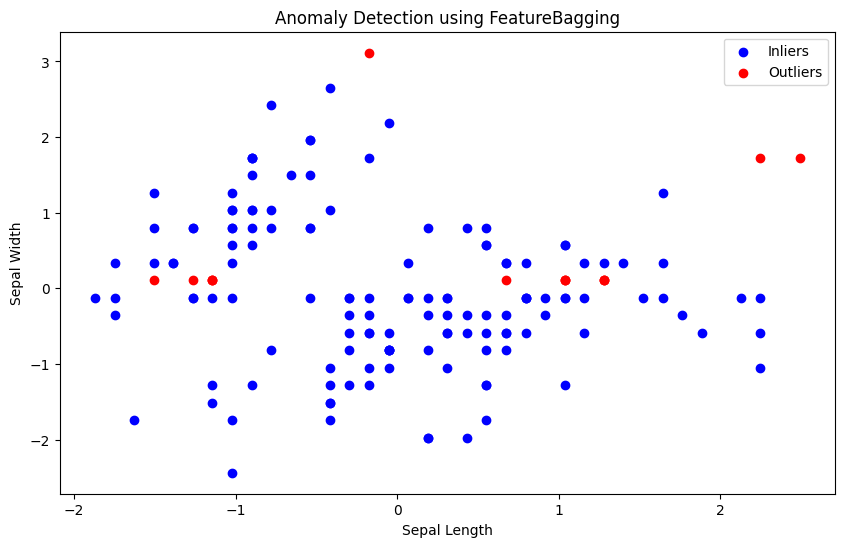

In [33]:

from pyod.models.feature_bagging import FeatureBagging

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Initialize Feature Bagging model
clf = FeatureBagging(n_estimators=100, contamination=0.1, bootstrap_features=True)

# Fit the model
clf.fit(df_scaled)

# Predict raw anomaly score
scores_pred = clf.decision_function(df_scaled) * -1

# Prediction of a datapoint category (outlier or inlier)
y_pred = clf.predict(df_scaled)

# Separate inliers and outliers
inliers = df_scaled[y_pred == 0]
outliers = df_scaled[y_pred == 1]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(inliers['sepal_length'], inliers['sepal_width'], color='blue', label='Inliers')
plt.scatter(outliers['sepal_length'], outliers['sepal_width'], color='red', label='Outliers')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Anomaly Detection using FeatureBagging')
plt.legend()
plt.show()




## **HBOS (Histogram-based Outlier Score):**

![image](https://miro.medium.com/v2/resize:fit:549/1*MHhR9X7FBV1S9m9i3V2iig.png)

HBOS обчислює оцінку аномалій на основі історграми ознак, розділених на декілька бінів. Цей метод добре підходить для швидкого та ефективного виявлення аномалій, особливо в наборах даних з великою кількістю точок.

HBOS (Histogram-based Outlier Score) - це алгоритм машинного навчання, який використовується для виявлення аномалій у наборах даних. Він базується на створенні гістограми для кожного змінної і оцінці ймовірності того, що точка належить до кожного інтервалу гістограми. Точки з низьким значенням ймовірності вважаються аномальними, оскільки вони мають незвичайні значення для змінних.

Принцип роботи HBOS:

1. Крок 1: Розбиття діапазону значень
   Для кожної змінної у наборі даних HBOS розбиває діапазон значень на деяку кількість інтервалів (бінів), які утворюють гістограму.

2. Крок 2: Обчислення ймовірності
   HBOS обчислює ймовірність того, що кожна точка належить до кожного інтервалу гістограми. Ймовірність розраховується шляхом порівняння значень змінних з межами інтервалів. Точки, які потрапляють в менші інтервали (з меншими ймовірностями), вважаються аномальними.

3. Крок 3: Розрахунок аномалій
   Значення ймовірності для кожної точки складаються, і аномалії визначаються на основі цієї суми. Точки з низькими значеннями суми (мало ймовірних точок) вважаються аномаліями, оскільки вони мають незвичайні значення для даних.

4. Крок 4: Виявлення аномалій
   Точки, для яких значення суми менше визначеного порогового значення, вважаються аномаліями. Визначення цього порогу може бути здійснено користувачем або залежати від властивостей даних.

5. Крок 5: Візуалізація
   Після виявлення аномалій за допомогою HBOS можна візуалізувати результати на графіку розсіювання. Аномальні точки можуть бути позначені іншим кольором або символом для виділення.

HBOS є швидким і ефективним методом виявлення аномалій, особливо в великих наборах даних. Він добре підходить для задач, де кількість змінних велика, і може бути успішно використаний для виявлення аномалій у різних типах даних. Проте, він також має свої обмеження, такі як відсутність урахування залежностей між змінними і чутливість до шуму в даних.

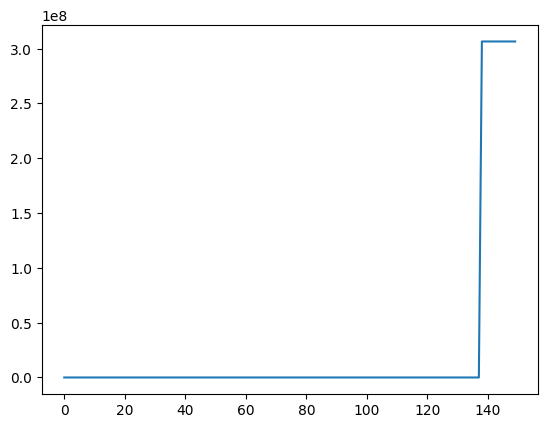

In [34]:
plt.plot(sorted(clf.decision_function(df_scaled)))

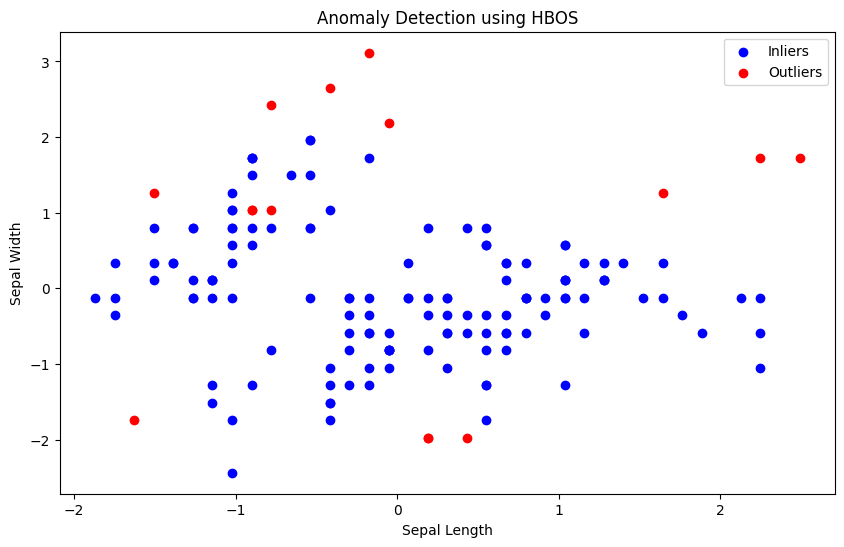

In [35]:

from pyod.models.hbos import HBOS

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


# Initialize HBOS model
clf = HBOS(contamination=0.1)

# Fit the model
clf.fit(df_scaled)

# Predict raw anomaly score
scores_pred = clf.decision_function(df_scaled) * -1

# Prediction of a datapoint category (outlier or inlier)
y_pred = clf.predict(df_scaled)

# Separate inliers and outliers
inliers = df_scaled[y_pred == 0]
outliers = df_scaled[y_pred == 1]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(inliers['sepal_length'], inliers['sepal_width'], color='blue', label='Inliers')
plt.scatter(outliers['sepal_length'], outliers['sepal_width'], color='red', label='Outliers')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Anomaly Detection using HBOS')
plt.legend()
plt.show()



## **LOF (Local Outlier Factor):**

![image](https://scikit-learn.org/stable/_images/sphx_glr_plot_lof_outlier_detection_001.png)

LOF (Local Outlier Factor) - це алгоритм машинного навчання, який використовується для виявлення аномалій у наборах даних. Його ідея полягає в тому, щоб оцінити ступінь відмінності кожної точки від її сусідів. Точки, які суттєво відрізняються від своїх сусідів, вважаються аномальними.

Добре, давайте дещо більш детально розглянемо принцип роботи алгоритму Local Outlier Factor (LOF) для виявлення аномалій:

1. Крок 1: Визначення параметра k
   Перш за все, потрібно визначити параметр k - кількість найближчих сусідів, які будуть використовуватися для оцінки кожної точки. Цей параметр може бути заздалегідь заданим користувачем або обчислений автоматично залежно від розміру набору даних.

2. Крок 2: Обчислення відстаней
   Для кожної точки у наборі даних обчислюється відстань від неї до її k-найближчих сусідів. Це може бути виконано за допомогою різних метрик відстані, таких як Евклідова відстань або Манхеттенська відстань.

3. Крок 3: Оцінка локальної густини
   LOF обчислює локальну густину кожної точки шляхом порівняння її відстаней до сусідів. Чим менше відстані до сусідів, тим більше точка схожа на своїх сусідів і тим вища її локальна густина.

4. Крок 4: Обчислення LOF
   LOF оцінює, наскільки сусіди кожної точки відрізняються від неї самої. Для цього використовується середнє співвідношення між локальною густиной точки і густинами її сусідів. Якщо локальна густина точки значно менша за густини її сусідів, то ця точка може вважатися аномальною, оскільки вона суттєво відрізняється від своїх сусідів.

5. Крок 5: Виявлення аномалій
   Точки, для яких значення LOF вище визначеного порогового значення, вважаються аномальними. Це означає, що такі точки суттєво відрізняються від своїх сусідів та можуть бути потенційними аномаліями у наборі даних.

6. Крок 6: Візуалізація
   Після виявлення аномалій за допомогою LOF можна візуалізувати результати на графіку розсіювання. Аномальні точки можуть бути позначені іншим кольором або символом для виділення.

Цей алгоритм є потужним і часто використовується для виявлення аномалій у різних типах даних. Варто враховувати, що правильне налаштування параметра k може суттєво вплинути на результати виявлення аномалій. Також варто враховувати, що швидкість обчислень LOF може бути проблемою для великих наборів даних.

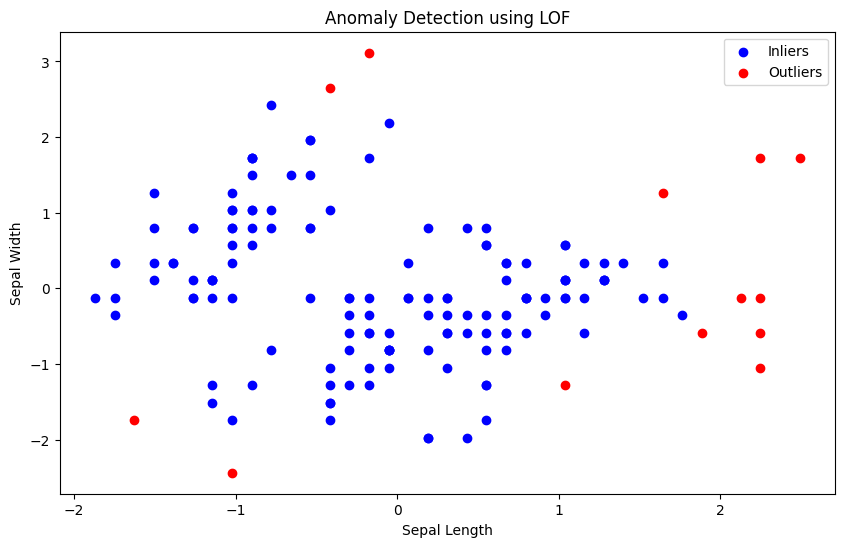

In [36]:
from pyod.models.lof import LOF

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Initialize LOF model
clf = LOF(contamination=0.1)

# Fit the model
clf.fit(df_scaled)

# Predict raw anomaly score
scores_pred = clf.decision_function(df_scaled) * -1

# Prediction of a datapoint category (outlier or inlier)
y_pred = clf.predict(df_scaled)

# Separate inliers and outliers
inliers = df_scaled[y_pred == 0]
outliers = df_scaled[y_pred == 1]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(inliers['sepal_length'], inliers['sepal_width'], color='blue', label='Inliers')
plt.scatter(outliers['sepal_length'], outliers['sepal_width'], color='red', label='Outliers')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Anomaly Detection using LOF')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but IsolationForest was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but IsolationForest was fitted without feature names



col_0,0,1
row_0,,
0,99,5
1,5,5


Accuracy Train: 0.9122807017543859


col_0,0,1
row_0,,
0,43,3
1,1,3


Accuracy Test: 0.92


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



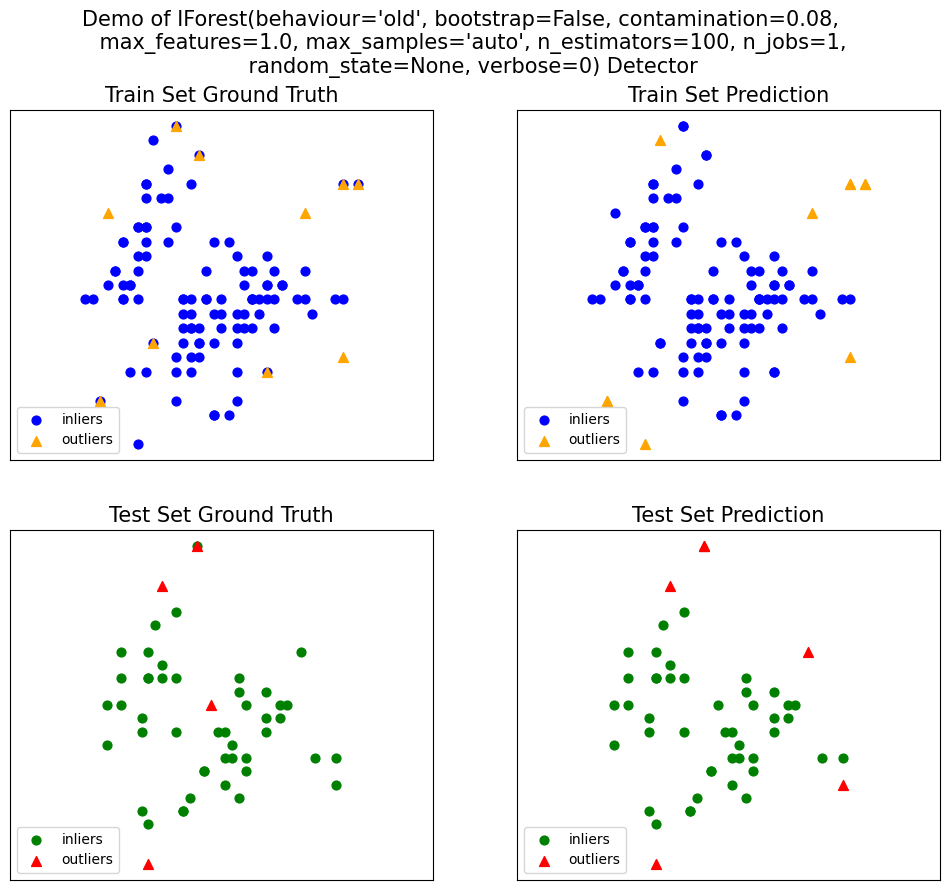

In [37]:
from pyod.models.iforest import IForest

# Initialize and train the KNN model
lof = IForest(contamination=0.08)
lof.fit(X_train)

# Make predictions on the training data
y_train_pred = lof.labels_
y_train_scores = lof.decision_scores_

# Make predictions on the test data
y_test_pred = lof.predict(X_test)
y_test_scores = lof.decision_function(X_test)

# Display the confusion matrix
display(pd.crosstab(y_train.values.reshape(-1), y_train_pred))
# Calculate accuracy
acc_score = accuracy_score(y_train.values.reshape(-1), y_train_pred)
print("Accuracy Train:", acc_score)


# Display the confusion matrix
display(pd.crosstab(y_test.values.reshape(-1), y_test_pred))
# Calculate accuracy
acc_score = accuracy_score(y_test.values.reshape(-1), y_test_pred)
print("Accuracy Test:", acc_score)

# Visualize the results
example.visualize(lof, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)


# **Prophet** - time-series
# **AutoEncoder** - Neural Network approach

In [38]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

nb_epoch = 100
batch_size = 128
input_dim = X_train.shape[1] #num of columns, 30
encoding_dim = 14
hidden_dim = int(encoding_dim / 2) #example 7
learning_rate = 1e-7

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [39]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[cp, tb]).history

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 1.0720 - accuracy: 0.5614 - val_loss: 1.1826 - val_accuracy: 0.5200
Epoch 2/100
1/1 [==============================] - 0s 152ms/step - loss: 1.0573 - accuracy: 0.5702 - val_loss: 1.1696 - val_accuracy: 0.5200
Epoch 3/100
1/1 [==============================] - 0s 178ms/step - loss: 1.0434 - accuracy: 0.6140 - val_loss: 1.1570 - val_accuracy: 0.5200
Epoch 4/100
1/1 [==============================] - 0s 212ms/step - loss: 1.0297 - accuracy: 0.5965 - val_loss: 1.1449 - val_accuracy: 0.5400
Epoch 5/100
1/1 [==============================] - 0s 132ms/step - loss: 1.0166 - accuracy: 0.6140 - val_loss: 1.1333 - val_accuracy: 0.5200
Epoch 6/100
1/1 [==============================] - 0s 118ms/step - loss: 1.0039 - accuracy: 0.6053 - val_loss: 1.1221 - val_accuracy: 0.5600
Epoch 7/100
1/1 [==============================] - 0s 126ms/step - loss: 0.9917 - accuracy: 0.5965 - val_loss: 1.1110 - val_accuracy: 0.5400
Epoch 8/100
1/1 

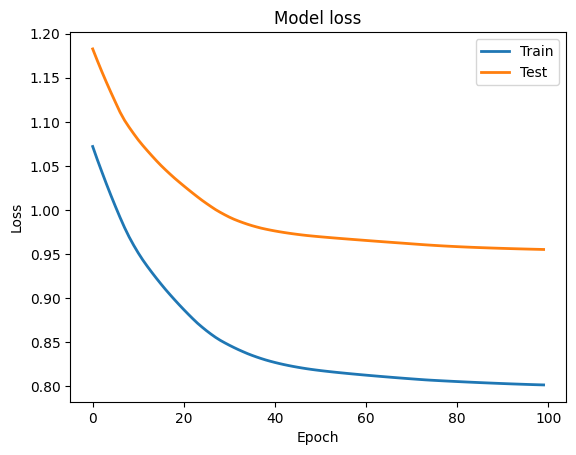

In [40]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [41]:
test_x_predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test.values.reshape(-1)})
error_df.describe()

2/2 [==============================] - 0s 7ms/step


,Reconstruction_error,True_class
count,50.000000,50.000000
mean,0.955290,0.080000
std,1.150267,0.274048
min,0.008133,0.000000
25%,0.173172,0.000000
50%,0.641627,0.000000
75%,1.298111,0.000000
max,4.911323,1.000000


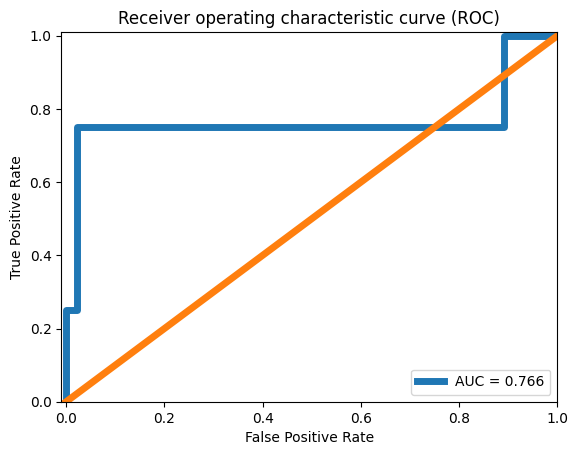

In [42]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.True_class, error_df.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

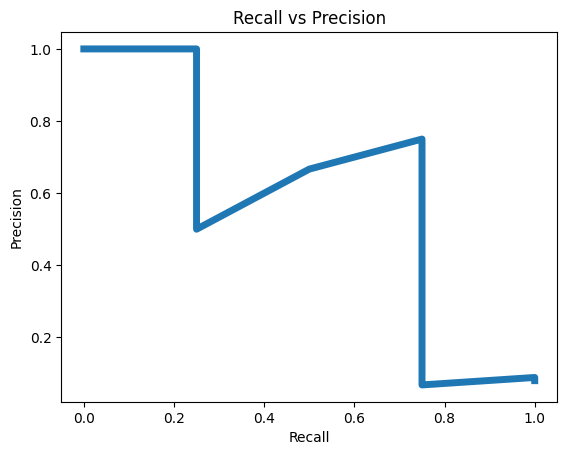

In [43]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(recall_rt, precision_rt, linewidth=5, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

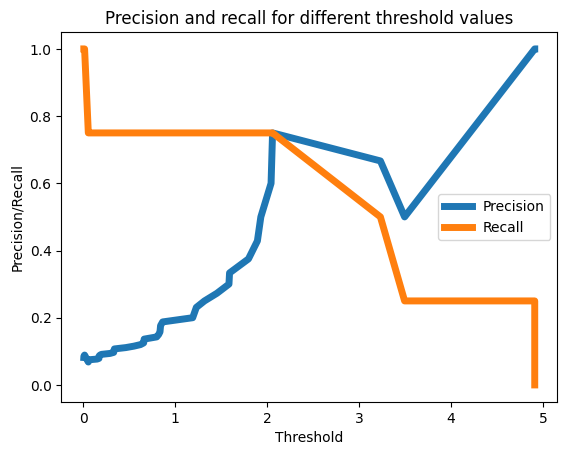

In [44]:
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

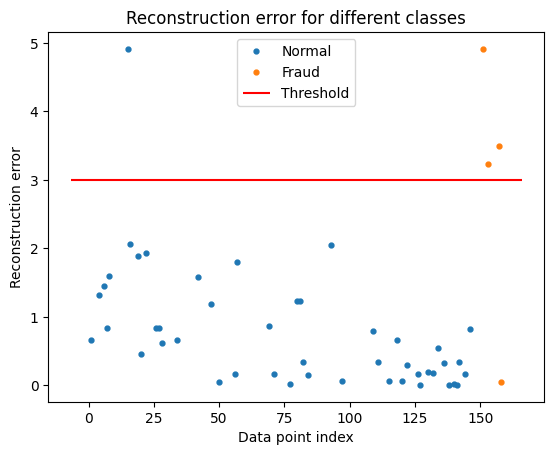

In [45]:
threshold_fixed = 3
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

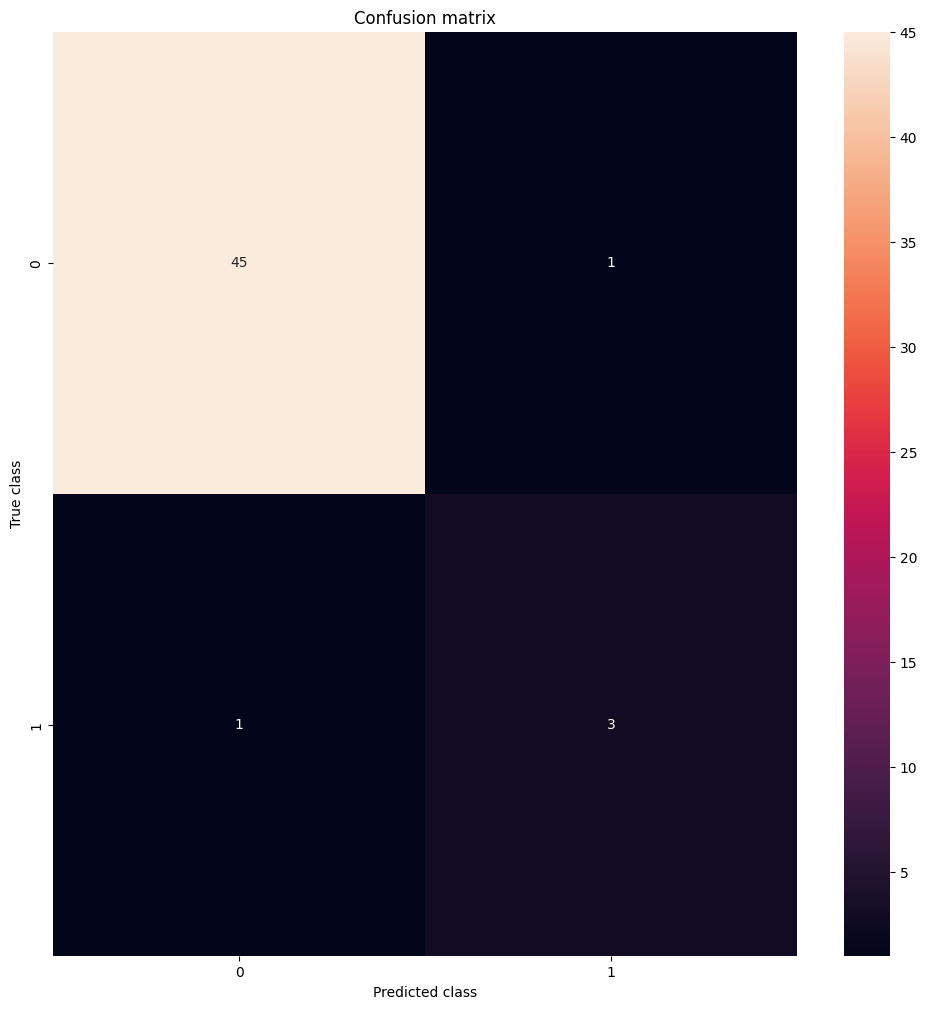

In [46]:
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=[0,1], yticklabels=[0,1], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [47]:
from __future__ import division
from __future__ import print_function

import os
import sys

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

# supress warnings for clean output
import warnings

warnings.filterwarnings("ignore")
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

# Import all models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.loci import LOCI
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.sos import SOS
from pyod.models.lscp import LSCP


In [53]:
# Define the number of inliers and outliers
n_samples = 150
outliers_fraction = 0.1
clusters_separation = [0]
n_inliers = int(y_train.sum())
random_state=0
n_outliers = len(y_train) - int(y_train.sum())

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
ground_truth = y_train.values.reshape(-1)

n_outliers = ground_truth.sum()

In [54]:
# initialize a set of detectors for LSCP
detector_list = [LOF(n_neighbors=5), LOF(n_neighbors=10), LOF(n_neighbors=20),
                 LOF(n_neighbors=35), LOF(n_neighbors=50)]


In [55]:
# Show the statics of the data
print('Number of inliers: %i' % n_inliers)
print('Number of outliers: %i' % n_outliers)
print(
    'Ground truth shape is {shape}. Outlier are 1 and inliers are 0.\n'.format(
        shape=ground_truth.shape))
print(ground_truth, '\n')


Number of inliers: 10
Number of outliers: 10
Ground truth shape is (114,). Outlier are 1 and inliers are 0.

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0] 



In [56]:
# Define nine outlier detection tools to be compared
classifiers = {
    'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
    'Cluster-based Local Outlier Factor (CBLOF)': CBLOF(contamination=outliers_fraction, check_estimator=False, random_state=random_state),
    'Feature Bagging': FeatureBagging(LOF(n_neighbors=35), contamination=outliers_fraction, check_estimator=False, random_state=random_state),
    'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
    'Isolation Forest': IForest(contamination=outliers_fraction, random_state=random_state),
    'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
    'Average KNN': KNN(method='mean', contamination=outliers_fraction),
    'Local Outlier Factor (LOF)': LOF(n_neighbors=35, contamination=outliers_fraction),
    'Minimum Covariance Determinant (MCD)': MCD(contamination=outliers_fraction, random_state=random_state),
    'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
    'Principal Component Analysis (PCA)': PCA(contamination=outliers_fraction, random_state=random_state),
    'Locally Selective Combination (LSCP)': LSCP(detector_list, contamination=outliers_fraction, random_state=random_state)
}

# Show all detectors
for i, clf in enumerate(classifiers.keys()):
    print('Model', i + 1, clf)

Model 1 Angle-based Outlier Detector (ABOD)
Model 2 Cluster-based Local Outlier Factor (CBLOF)
Model 3 Feature Bagging
Model 4 Histogram-base Outlier Detection (HBOS)
Model 5 Isolation Forest
Model 6 K Nearest Neighbors (KNN)
Model 7 Average KNN
Model 8 Local Outlier Factor (LOF)
Model 9 Minimum Covariance Determinant (MCD)
Model 10 One-class SVM (OCSVM)
Model 11 Principal Component Analysis (PCA)
Model 12 Locally Selective Combination (LSCP)



1 fitting Angle-based Outlier Detector (ABOD)

2 fitting Cluster-based Local Outlier Factor (CBLOF)

3 fitting Feature Bagging

4 fitting Histogram-base Outlier Detection (HBOS)

5 fitting Isolation Forest

6 fitting K Nearest Neighbors (KNN)

7 fitting Average KNN

8 fitting Local Outlier Factor (LOF)

9 fitting Minimum Covariance Determinant (MCD)

10 fitting One-class SVM (OCSVM)

11 fitting Principal Component Analysis (PCA)

12 fitting Locally Selective Combination (LSCP)


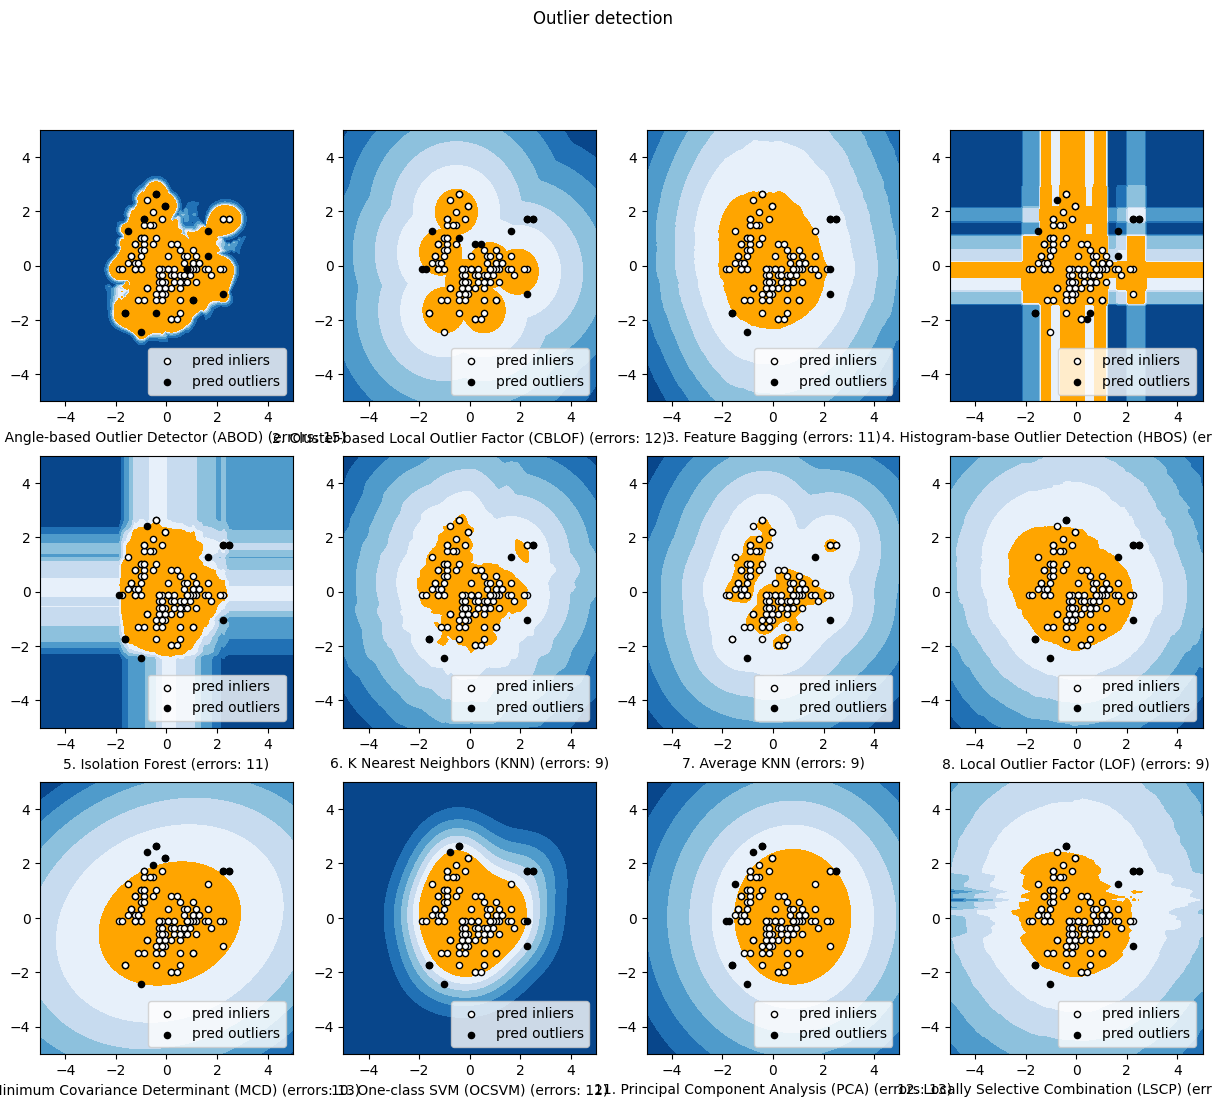

In [57]:
# Fit the model
plt.figure(figsize=(15, 12))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    print()
    print(i + 1, 'fitting', clf_name)
    # fit the data and tag outliers
    clf.fit(X_train)
    scores_pred = clf.decision_function(X_train) * -1
    y_pred = clf.predict(X_train)
    threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)
    n_errors = (y_pred != ground_truth).sum()

    # plot the levels lines and the points
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
    subplot = plt.subplot(3, 4, i + 1)
    subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                     cmap=plt.cm.Blues_r)

    # a = subplot.contour(xx, yy, Z, levels=[threshold],
    #                     linewidths=2, colors='red')
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                     colors='orange')

    # Use boolean indexing on y_pred to separate the points
    b = subplot.scatter(X_train[y_pred == 0]["sepal_length"], X_train[y_pred == 0]["sepal_width"], c='white', s=20, edgecolor='k')
    c = subplot.scatter(X_train[y_pred == 1]["sepal_length"], X_train[y_pred == 1]["sepal_width"], c='black', s=20, edgecolor='k')

    subplot.axis('tight')
    subplot.legend(
        [b, c],
        ['pred inliers', 'pred outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='lower right')
    subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
    # Set custom x-axis and y-axis limits
    subplot.set_xlim((-5, 5))  # Adjust the limits as needed
    subplot.set_ylim((-5, 5))  # Adjust the limits as needed

plt.suptitle("Outlier detection")
plt.savefig('ALL.png', dpi=300)
plt.show()
